In [1]:
# importing all necessary libraries

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
import gc; gc.enable()

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# from imblearn.over_sampling import SMOTE

In [2]:
# Load clean data

df=pd.read_csv('data/clean_data.csv')

In [3]:
pd.options.display.max_columns=100   #to see all columns

df

,Unnamed: 0,status_group,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade
0,0,0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s
1,1,0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s
2,2,0,Lottery Club,686,world vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s
3,3,2,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s
4,4,0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,59395,0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,90s
59396,59396,0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,90s
59397,59397,0,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,281,True,False,2000,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0
59398,59398,0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,281,True,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0


In [4]:
# dropping unnamed column and other unnecessary columns
df.drop(columns=['Unnamed: 0', 'funder', 'installer', 'construction_year'], inplace=True)

In [5]:
df.head()

,status_group,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade
0,0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s
1,0,1399,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s
2,0,686,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s
3,2,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s
4,0,0,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0


We will first try to simplify our problem to find the best model. We will use different encoder, scaler, classifier and try different models.For simplicity, we will merge 'functional' and 'functional but needs repair' and assign this to 1. We will assign 'non-functional' to 0. 
We will use a simple model then improve on it. After finding the best model, we will try it for the multi-class label format.

In [6]:
# TO protect the original clead data, we will make a copy of it

df1 = df.copy()

In [7]:
df1

,status_group,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade
0,0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s
1,0,1399,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s
2,0,686,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s
3,2,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s
4,0,0,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,1210,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,90s
59396,0,1212,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,True,gravity,vwc,pay annually,soft,enough,river,communal standpipe,90s
59397,0,0,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,281,True,False,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0
59398,0,0,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,281,True,True,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0


In [8]:
# dropping the Iga and Ward columns as they are irrelevant to our models

df1.drop(columns=['lga', 'ward'], inplace=True)

In [9]:
# Changing the permit and public_meeting columns with boolean values to integers/binary

df1['permit'] = df1['permit'].astype(bool).astype(int)
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [10]:
df1.head()

,status_group,gps_height,longitude,latitude,basin,region,district_code,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade
0,0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,109,1,0,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s
1,0,1399,34.698766,-2.147466,Lake Victoria,Mara,2,280,1,1,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s
2,0,686,37.460664,-3.821329,Pangani,Manyara,4,250,1,1,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s
3,2,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,58,1,1,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s
4,0,0,31.130847,-1.825359,Lake Victoria,Kagera,1,281,1,1,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0


In [11]:
df1.columns

Index(['status_group', 'gps_height', 'longitude', 'latitude', 'basin',
       'region', 'district_code', 'population', 'public_meeting', 'permit',
       'extraction_type_group', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'decade'],
      dtype='object')

Next, we will use scaler for numeric columns and encoder for categorical 
columns. To do this, we will divide the columns into two:

In [12]:
# categorical columns

cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade']

# 'installer_cat','funder_cat'

In [13]:
# numerical columns

num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [14]:
df1['status_group'].value_counts()

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64

0: functional
1: functional but needs repair
2: non-fucntional


As explained before, we will take 'functional' and 'functional but needs repair' together and make them 1, non-functional will be represented by 0.

In [15]:
# Getting together the labels and converting them

target_status_group = {0:1, 1:1, 2:0}
df1['status_group'] = df1['status_group'].replace(target_status_group)

In [16]:
df1['status_group'].value_counts()

status_group
1    36576
0    22824
Name: count, dtype: int64

1: functional

0: no-functional

Now we will assign our target column

In [17]:
target = 'status_group'

**Pipeline / Baseline**

In [18]:
# Dividing X and target

variables = [c for c in df1.columns.tolist() if c not in [target]]
X = df1[variables]
y = df1[target]

In [19]:
# Dviding the X and y to test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will first use the train test split to figure out our problem. After learning from the baseline, we will use cross validation technique to find the best result, because it is more convenient and easy to understand what is going on.
For some models we will use both of them to check if our results are consistent or not.

**Baseline - Robust Scaler / Target Encoder with LogReg**

To scale numeric values and encode categorical columns, we will make a pipeline and also use it in our model and classifier changes. For the first trial we will use Robust Scaler as a scaler. Robust scales variables using statistics that are strong to outliers. Robust Scaler uses IQR(Interquartile Range). For an encoder, we will try target encoder which works well with higher cardinality features and our data has higher unique values also. Our first trial for baseline is Logistic Regression which predicts the probability that a certain instance belongs to a class. We will use balanced as class weight, because our classes are imbalanced.

In [20]:
#making pipeline

scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42)

# giving all values to pipeline
pipe = make_pipeline(preprocessor,lr)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7650462962962963
TEST: 0.7691077441077441

Balanced Accuracy:
TRAIN: 0.7429645277715105
TEST: 0.7463285839270091


These values can be chosen as baseline. For better understanding, we will plot the confusion matrix

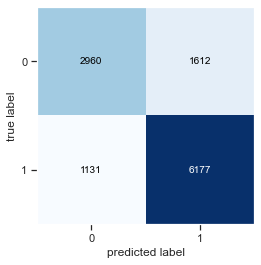

In [21]:
# plotting confusion matrix

cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

interpretations from the confusion matrix include: 1131 were predicted as non-functional but were functional. 1612 were predicted as functional but were non-functional.

We will now take the roc_auc score with doing LogReg with cross validation to compare other model results.
We will take the mean of the scores and std to understand better. CHoosing a cv of 5 will give 5 different result for each trial.

In [22]:
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean())
print(scores.std())

0.8256888060510106
0.004595979195920358


It is evident that we find better results than splitting the data. The std is not too high.

**Robust Sclaer / WoE Encoder with LogReg**

The weight of evidence encoder works as the predictive power of an independent variable according to the dependent variable. It calculates % of events and % of non-events.

In [23]:
scaler = RobustScaler()
encoder = ce.WOEEncoder(cols=cat_col)

# puttng numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder wit preprocessor
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor, lr)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

print(scores.mean())
print(scores.std())

0.826122184794445
0.004584661595437696


This one is better than the baseline, we will change the encoder to this one.

**Robust Scaler / LeaveOneOut Encoder with LogReg**

LeaveOneOut Encoder excludes the row's target when calculating the mean target for a level to reduce the level of outliers. 

In [24]:
scaler = RobustScaler()
encoder = ce.LeaveOneOutEncoder(cols=cat_col)

# puttng numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder wit preprocessor
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor, lr)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

print(scores.mean())
print(scores.std())

0.8256866255634053
0.004611613857759106


It perfromed poorly compared to WoE. We will not change the encoder.

**Robust Scaler / OneHot Encoder with LogReg**

In [25]:
scaler = RobustScaler()
encoder = ce.OneHotEncoder(cols=cat_col)

# puttng numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder wit preprocessor
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor, lr)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

print(scores.mean())
print(scores.std())

0.8482367988358217
0.0027960001203645


OneHot Encoding perfomrs best. bust since our data has high cardinality with high categorical variables, we wills stick to WoE Encoding.

**MinMax Scaler / WoE Encoder with LogReg**

We will use this to compare our results because when the distribution is not Gaussian or the std is very small, the min-max scaler works well.

In [26]:
scaler = MinMaxScaler()
encoder = ce.WOEEncoder(cols=cat_col)

# puttng numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder wit preprocessor
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor, lr)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

print(scores.mean())
print(scores.std())

0.8260884770634895
0.004539096673098554


We will stick with Robust Scaler since the results do not change that significantly.

**Decision Tree Classifier**

From LogReg we have a score of 0.8261. We will try and imrove this using other methods.

In [27]:
dt =  DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5, random_state=42, class_weight='balanced')

pipe = make_pipeline(preprocessor, dt)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

print(scores.mean())
print(scores.std())

0.7870188620538323
0.007796368133039169


**ExtraTress Classifier**

Extra trees works like a Random Forest by building multiple trees and splits nodes using subsets of features. The main differrences are that it samples with replacement and nodes are split randomly, not on best splits.

In [28]:
rf_extra =  ExtraTreesClassifier(max_depth=5, criterion='entropy', min_samples_leaf=3, min_samples_split=18, random_state=42,
                                n_estimators=100, class_weight='balanced', n_jobs=-1)

pipe=make_pipeline(preprocessor, rf_extra)
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

print(scores.mean())
print(scores.std())

0.8305119724917882
0.003600231387848222


The resukts are better than Decision tree Classifier. 

**RandomForest Classifier**


Random Forest models can reduce overfitting by randomness.

In [29]:
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, class_weight='balanced')

pipe = make_pipeline(preprocessor, rf)

scores =  cross_val_score(pipe, X, y, cv=5, scoring = 'roc_auc')

print(scores.mean())
print(scores.std())

0.918803366355246
0.0022988330121437315


Random FOrest gave very good results. We played around with parameters and found these results on first trial basis. We will no look for better results with tuning our parameter.

**Best Decided Model for Binary Target**

Accuracy:
TRAIN: 0.952209595959596
TEST: 0.8585016835016835

Balanced Accuracy:
TRAIN: 0.9484695808496546
TEST: 0.8459292803916751


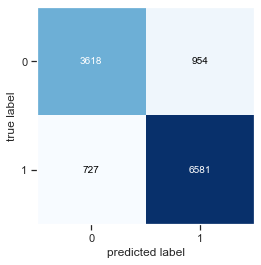

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced',
                            criterion = 'entropy',max_features = 'sqrt',min_samples_split = 10)
 
pipe = make_pipeline(preprocessor,rf)
pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

**3-Class Target Modeling**

Since we got good results with Random Forest for binary target, we will replicate this fro the 3-class target.

We will use Random Forest, LGBM, and XGBoost with smote techniques applied to the imbalanced target data.

In [31]:
df1['status_group'].value_counts()

status_group
1    36576
0    22824
Name: count, dtype: int64

In [32]:
# reimporting the clean dataset to get the targets
data = pd.read_csv('data/clean_data.csv')

In [33]:
data['status_group'].value_counts()

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64

For pur target variables:

0: Functional

1: Functional byut needs repair

2: Non-functional

In [34]:
# droppping unnecessary columns
data.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True )

In [35]:
data_1 = data.copy()

In [36]:
data_1.drop(columns=['lga','ward'],inplace=True )

In [37]:
data_1['permit'] = data_1['permit'].astype(bool).astype(int)

In [38]:
# assigning categorical columns
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade']

In [39]:
# assigning numeric columns
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [40]:
# assign target
target='status_group'

In [41]:
# seperate columns to X,y 
used_cols = [c for c in data_1.columns.tolist() if c not in [target]]
X=data_1[used_cols]
y=data_1[target]

In [42]:
# choosing train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Just like previously done, we will scale numeric columns and encode categorical columns. The main difference is we will use TargetEncoder since Weight of Evidence encoder is not suitable for multiclass problems.

**Random Forest**

In [43]:
# choosing scaler and encoder
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)])

# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, criterion= 'entropy',max_features= 'sqrt', min_samples_split= 10,class_weight='balanced')

#giving all values to pipeline

pipe = make_pipeline(preprocessor,rf)


pipe.fit(X_train,y_train)
# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9204545454545454
TEST: 0.7914141414141415

Balanced Accuracy:
TRAIN: 0.9341261042973555
TEST: 0.7044348948246997


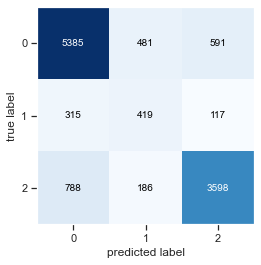

In [44]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

Our 3-class dataframe does not fit well to previous binary model. It is highly overfit. To handle the overfit we will try to LGBM and XGBoost with parameters.

**LGBM**

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] num_iterations is set=100, nrounds=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

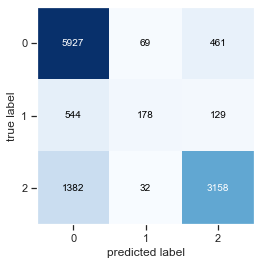

In [45]:
#seting model
lgbm = LGBMClassifier(booster = 'gbtree', nrounds = 100, maximize = False,eta = .1,max_depth = 10, colsample_bytree = .4,learning_rate = 0.1,max_delta_step=1)

#sending everthing in pipe
pipe = make_pipeline(preprocessor,lgbm)
pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

**XGBoost**

[21:01:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { maximize, nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy:
TRAIN: 0.8409722222222222
TEST: 0.7988215488215489

Balanced Accuracy:
TRAIN: 0.6727390495340381
TEST: 0.6240571109710287


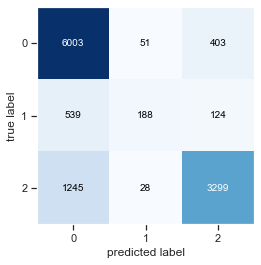

In [46]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

XGBoost also gave overfit results. There are big difference between accuracy and balanced accuracy. 62% is very less. From this information, we understand that we need to solve our imbalanced class problem. To do this, there are some ways. We can set class weight as balanced in Random Forest which we have already done. The other common solution is resampling imbalanced data. There are two main ways; over-sampling and under-sampling. One of our labels is really insufficient. So, we will use over sampling technique. It tries to balance target with increasing the number of the rare samples. To protect our data from abundant samples, new rare samples must be generated by using techniques as repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique).

**SMOTE**

To use SMOTE with scaler and encoder takes too much time. So, we will encode and scale our dataframe and change it. To protect the original one, we assign it to new df.

In [47]:
data_2 = data.copy()

In [48]:
data_2.drop(columns=['lga', 'ward'], inplace=True)

In [49]:
# encoding categorical columns
encoder = TargetEncoder()

for c in cat_col:
    data_2[str(c) + '_encoded'] = encoder.fit_transform(data_2[c].values, data_2[target])
    data_2.drop(columns=c, inplace=True) 

In [50]:
# scaling numerical columns

scaler = preprocessing.RobustScaler()


def scaleColumns(data, num_col):
    for col in num_col:
        data[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data_2[col])),columns=[col])
    return df

scaled_df = scaleColumns(data_2,[num_col])

In [51]:
# assign X and y
used_cols = [c for c in scaled_df.columns.tolist() if c not in [target]]
X=scaled_df[used_cols]
y=scaled_df[target]

In [52]:
# making over-sampling 
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_sampled, y_sample = smt.fit_resample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())

ValueError: could not convert string to float: 'Lake Nyasa'

In [ ]:
data_2
